In [13]:
import numpy as np
from astropy import units as u
from astropy.constants import GM_sun
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import random
import pandas as pd
import cmath
import glob
warnings.filterwarnings("ignore")

In [43]:
def put_labels (x_label, y_label, title):
    
    plt.rcParams["figure.figsize"] = (10,10)
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.legend(loc='lower right',prop={'size': 15})
    plt.yticks(size=15)
    plt.xticks(size=15)
    


In [44]:
'''
with open('w.txt', 'r') as f:
    w_math = f.read().splitlines()
    
with open('final_levin.txt', 'r') as f:
    math_res = f.read().splitlines()
    
with open('abs03_arg.txt', 'r') as f:
    abs_math = f.read().splitlines()
'''
w=np.linspace(0.001,100,1000)

In [45]:
df=pd.read_csv('./Levin/final_levin.txt', sep="\t")
df_sis=pd.read_csv('./Levin/final_levin_sis.txt', sep="\t")
#df.drop('Unnamed: 0')
df_sis.head()


,Unnamed: 0,res_simple,time_simple,res_fixed,time_fixed,res_adaptive,time_adaptive
0,0,(1.0273382105657238-0.026379957065613097j),0.004987,(1.0238939974521417-0.031840266725977416j),0.080667,(1.0677531415108699-0.05983812105972598j),0.336288
1,1,(1.2907393133065563-0.2939082934431032j),0.002660,(1.2905964351953927-0.29401544033172794j),0.080295,(1.2905428617192776-0.2938315072227648j),0.289253
2,2,(1.422866862421669-0.41457029241123405j),0.004121,(1.422900382533959-0.4144368304090109j),0.084100,(1.4249053186045921-0.41149405488623236j),0.331229
3,3,(1.533537483594096-0.5027231384842299j),0.002510,(1.5334328472027232-0.5027585614514597j),0.104288,(1.5329897703922641-0.5028151639555714j),0.330224
4,4,(1.6343559923677944-0.5722417760767226j),0.004945,(1.634374449820743-0.572299703657658j),0.116620,(1.632374518652666-0.5709196998467694j),0.282711


In [46]:
#df.res_simple.values

In [47]:
#abs_math=[float(i) for i in abs_math]
#w_math=[float(i) for i in w_math]

res_simple=[float(abs(complex(i))) for i in df.res_simple.values]
res_fixed=[float(abs(complex(i))) for i in df.res_fixed.values]
res_adaptive=[float(abs(complex(i))) for i in df.res_adaptive.values]


res_simple_phase=[float(cmath.phase(complex(i))) for i in df.res_simple.values]
res_fixed_phase=[float(cmath.phase(complex(i))) for i in df.res_fixed.values]
res_adaptive_phase=[float(cmath.phase(complex(i))) for i in df.res_adaptive.values]


In [48]:
res_adaptive_sis=[float(abs(complex(i))) for i in df_sis.res_adaptive.values]
res_adaptive_phase_sis=[float(cmath.phase(complex(i))) for i in df_sis.res_adaptive.values]

No handles with labels found to put in legend.


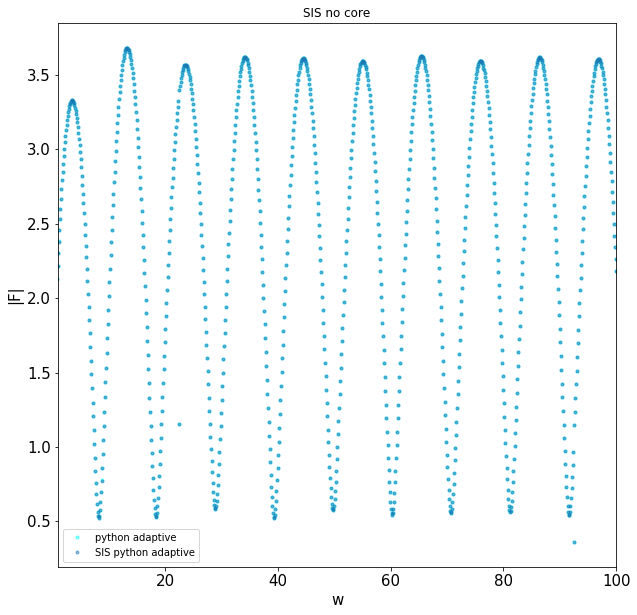

In [49]:
plt.rcParams["figure.figsize"] = (10,10)
put_labels('w','|F|','SIS no core')
#subplot(w,res_simple,label='python simple',c='k')
#subplot(w,res_fixed,label='python fixed',c='pink',style='-')
plt.plot(w,res_adaptive,'.',label='python adaptive',color='cyan', alpha=0.5)
    
plt.plot(w,res_adaptive_sis,'.',label='SIS python adaptive', alpha=0.5)
#plt.plot(w,res_fixed_sis,'.',label='SIS python fixed', alpha=0.2)
#plt.plot(w_math,abs_math, '--',label='mathematica result',color='g',linewidth=0.5, alpha=0.8)
plt.xlim(1, 100)
plt.legend()
plt.savefig('Results/SIS_module.png')


## Study on the core parameter

In [103]:
pointRef=pd.read_csv('./Results/pointmass/Analytic_pointmass_lens_dist_0.3.txt', sep="\t")
pointRefamp=pointRef.Famp.values
pointRefphase=pointRef.Fphase.values
wpoint=np.linspace(0.001,100,5000)


SISRef=pd.read_csv('./Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.0_c_1.txt', sep="\t")
SISRefamp=[float(abs(complex(i))) for i in SISRef.res_adaptive.values]
SISRefphase=[float(cmath.phase(complex(i))) for i in SISRef.res_adaptive.values]

In [83]:
folder='./Results/SIScore/Levin_SIScore_lens_dist_0.3*'
folders_list=sorted(glob.glob(folder))
bLin=np.linspace(0,1,5)
w=np.linspace(0.001,100,1000)

In [84]:
folders_list

['./Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.0_c_1.txt',
 './Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.25_c_1.txt',
 './Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.5_c_1.txt',
 './Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_0.75_c_1.txt',
 './Results/SIScore/Levin_SIScore_lens_dist_0.3_a_1_b_1.0_c_1.txt']

No handles with labels found to put in legend.


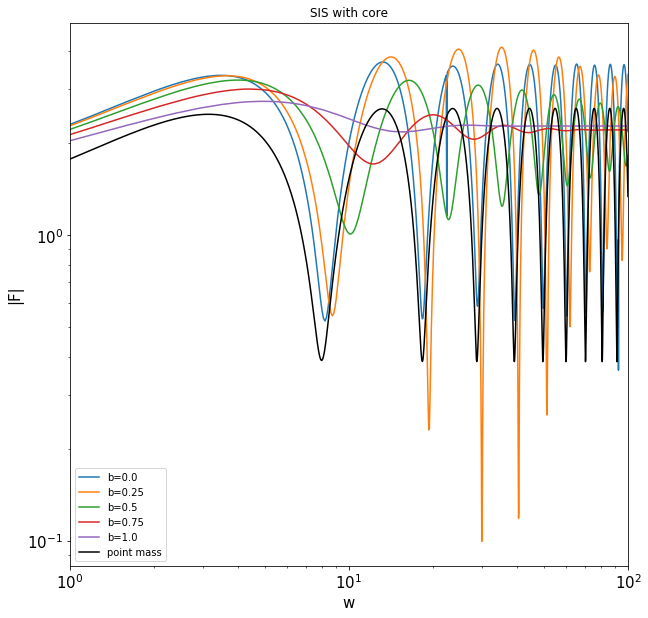

In [85]:
put_labels('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    #phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    plt.plot(w,amp,'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 100)
    #plt.ylim(1, 100)
plt.plot(wpoint,pointRefamp, label='point mass', color='k')

plt.legend()
plt.savefig('./Results/SIScore/SIS_core_study_upto1.png')
plt.show()

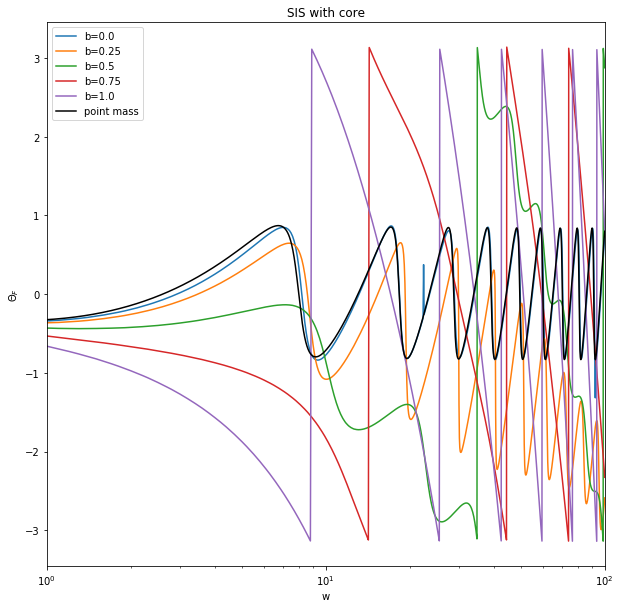

In [86]:
#create_plots('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    #amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    plt.plot(w,phase,'-',label='b='+str(b))
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlim(1, 100)
    #plt.ylim(1, 100)
    
plt.plot(wpoint,pointRefphase, label='point mass', color='k')
plt.title('SIS with core')
plt.xlabel('w', fontsize=10)
plt.ylabel('$\Theta_F$', fontsize=10)
plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_study_upto0.9.png')
plt.show()

In [87]:
def beta(theta,b):
    E_r=1
    return theta - theta/np.sqrt(b**2+theta**2)

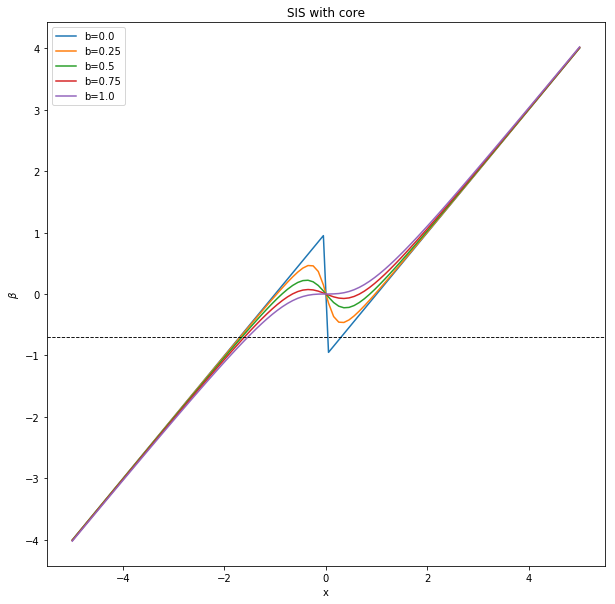

In [88]:
theta=np.linspace(-5,5,100)
ax = plt.gca()
for b in bLin:
    #plt.plot(theta,beta(theta,b),'-',label='b='+str(b))
    vline_color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(theta,beta(theta,b),'-',label='b='+str(b), color=vline_color)
plt.axhline(beta(0.3,0),ls='--',linewidth=0.9, color='k')
    #plt.xlim(1, 100)
    
#plt.axhline(0,color='k',ls='-',linewidth=1)
#plt.axvline(0,color='k',ls='-',linewidth=1)
#plt.axhline(beta(0.51),color='b',ls='--',linewidth=0.5, label=r'$\beta$')
plt.title('SIS with core')
plt.xlabel('x', fontsize=10)
plt.ylabel(r'$\beta$', fontsize=10)
plt.legend()
#plt.axes()
plt.savefig('Results/SIScore/phase_SIS_core_study_upto1.png')
plt.show()

## Power-law lens  
## 0-1

In [89]:
folder_power='./Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3*'
folders_list_power=sorted(glob.glob(folder_power))
pLin=np.linspace(0.01,0.9 ,5)
w=np.linspace(0.001,100,1000)
folders_list_power

['./Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.01.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.2325.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.455.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.6775.txt',
 './Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.9.txt']

No handles with labels found to put in legend.


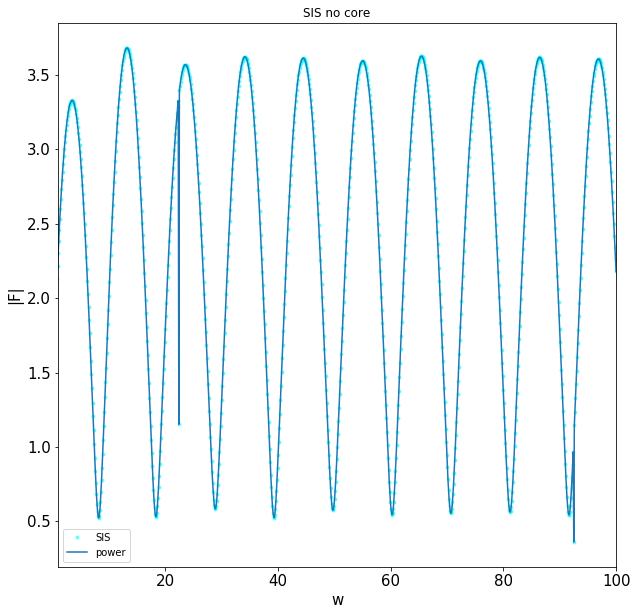

In [104]:
dfpower_1=pd.read_csv(folders_list_power[0], sep="\t")
amppower_1=[float(abs(complex(i))) for i in dfpower_1.res_adaptive.values]


put_labels('w','|F|','SIS no core')
plt.plot(w,SISRefamp,'.',label='SIS',color='cyan', alpha=0.5)
plt.plot(w,amppower_1,label='power')

plt.xlim(1, 100)
plt.legend()
plt.savefig('SIS_module.png')


No handles with labels found to put in legend.


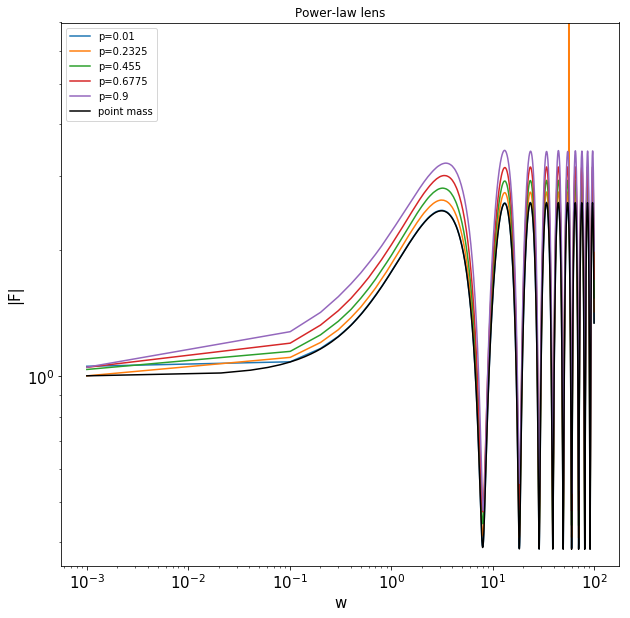

In [91]:
put_labels('w','|F|','Power-law lens')
for fol,p in zip(folders_list_power, pLin):
    
    dfPower=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w,amp,'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.,7)
plt.plot(wpoint,pointRefamp, label='point mass', color='k')
plt.legend()
plt.savefig('./Results/powerlaw/0-1/amp_powerlaw_range_01.png')
plt.show()



No handles with labels found to put in legend.


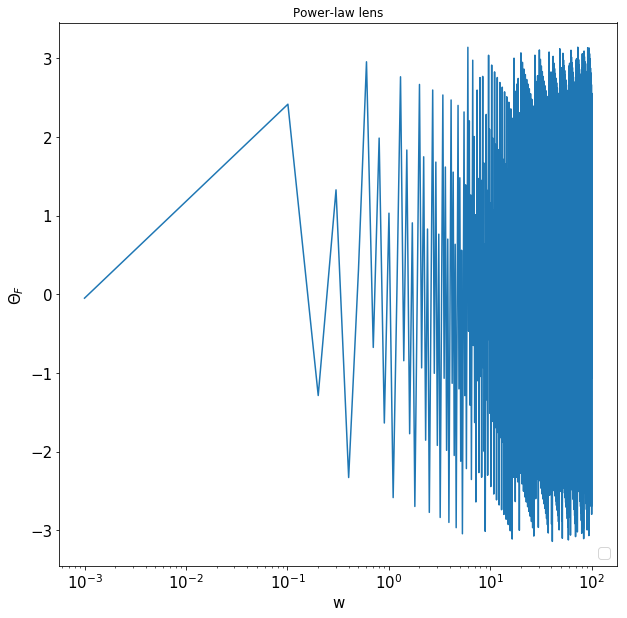

In [92]:
put_labels('w','$\Theta_F$','Power-law lens')
dfPower=pd.read_csv('./Results/powerlaw/0-1/Levin_powerlaw_lens_dist_0.3_p_0.01.txt', sep="\t")
phase=[float(cmath.phase(complex(i))) for i in dfPower.res_adaptive.values]
plt.plot(w,phase,'-',label='p='+str(p))
plt.xscale('log')

No handles with labels found to put in legend.


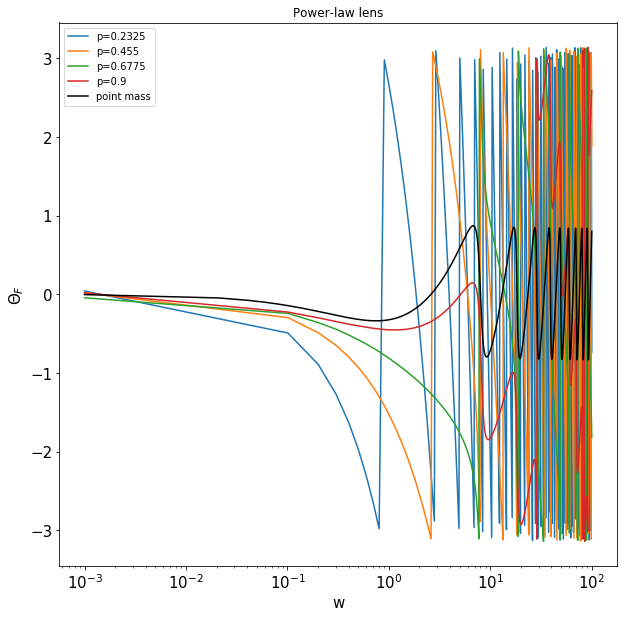

In [94]:
put_labels('w','$\Theta_F$','Power-law lens')
for fol,p in zip(folders_list_power[1:], pLin[1:]):
    dfPower=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w,phase,'-',label='p='+str(p))
    plt.xscale('log')
    #plt.xlim(10, 100)

plt.plot(wpoint,pointRefphase, label='point mass', color='k')
plt.legend()
plt.savefig('./Results/powerlaw/0-1/phase_powerlaw_range_12.png')
plt.show()

## Power-law lens  
## 1-2

In [99]:
folder_power='./Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_*'
folders_list_power=sorted(glob.glob(folder_power))
pLin=np.linspace(1,2,5)
w=np.linspace(0.001,100,1000)

In [100]:
folders_list_power

['./Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.0.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.25.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.5.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_1.75.txt',
 './Results/powerlaw/1-2/Levin_powerlaw_lens_dist_0.3_p_2.0.txt']

No handles with labels found to put in legend.


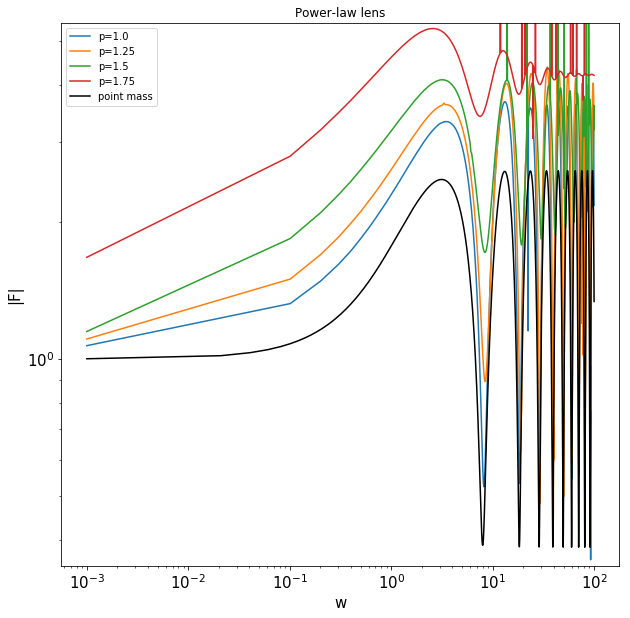

In [101]:
put_labels('w','|F|','Power-law lens')

for fol,p in zip(folders_list_power[:-1], pLin[:-1]):
    
    dfPower=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w,amp,'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    
plt.ylim(0.35,5.5)
plt.plot(wpoint,pointRefamp, label='point mass', color='k')
plt.legend()
plt.savefig('./Results/powerlaw/1-2/amp_powerlaw_range_12.png')
plt.show()



No handles with labels found to put in legend.


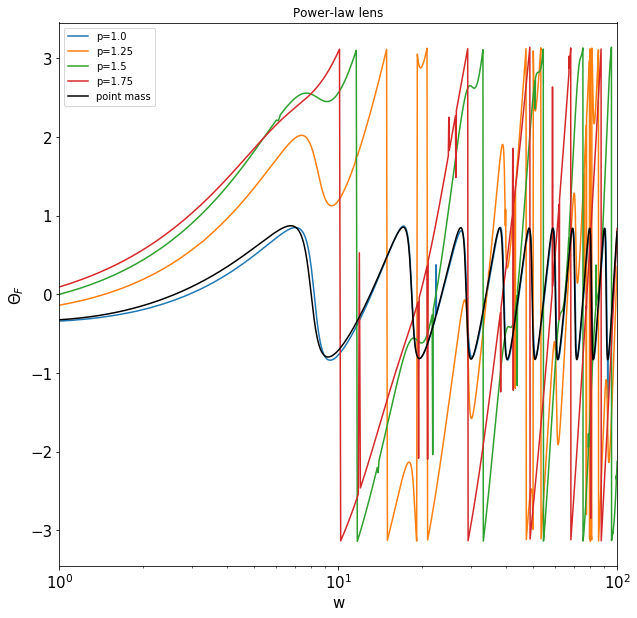

In [102]:
put_labels('w','$\Theta_F$','Power-law lens')
for fol,p in zip(folders_list_power[:-1], pLin[:-1]):
    dfPower=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfPower.res_adaptive.values]
    plt.plot(w,phase,'-',label='p='+str(p))
    plt.xscale('log')
    plt.xlim(1, 100)

plt.plot(wpoint,pointRefphase, label='point mass', color='k')
plt.legend()
plt.savefig('./Results/powerlaw/1-2/phase_powerlaw_range_12.png')
plt.show()

## Point mass

In [66]:
folder_point='./Results/pointmass/*'
folders_list_point=sorted(glob.glob(folder_point))
yLin=[0.1, 0.3,1.0,3.0]
w_range=np.linspace(0.001,100,5000)
folders_list_point

['./Results/pointmass/Analytic_pointmass_lens_dist_0.1.txt',
 './Results/pointmass/Analytic_pointmass_lens_dist_0.3.txt',
 './Results/pointmass/Analytic_pointmass_lens_dist_1.0.txt',
 './Results/pointmass/Analytic_pointmass_lens_dist_3.0.txt',
 './Results/pointmass/amp_analytic_pointmass.png',
 './Results/pointmass/phase_analytic_pointmass.png']

No handles with labels found to put in legend.


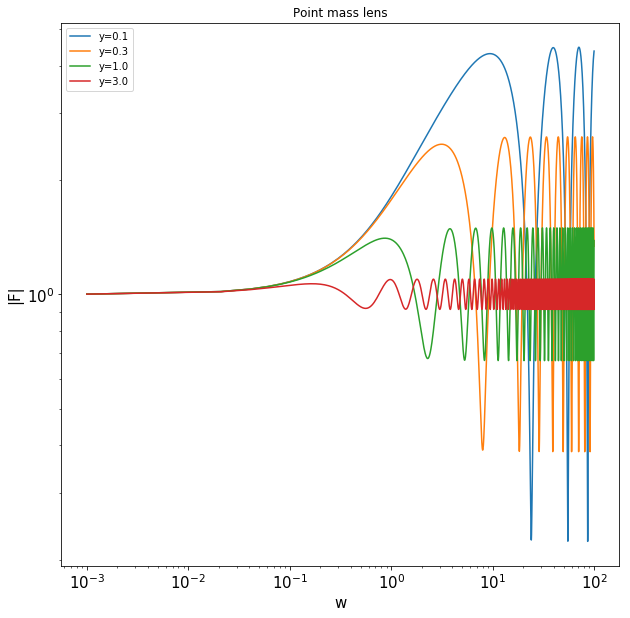

In [67]:
put_labels('w','|F|','Point mass lens')
for fol,y in zip(folders_list_point, yLin):

    dfpoint=pd.read_csv(fol, sep="\t")
    amp=dfpoint.Famp.values
    #phase=dfpoint.Fphase.values

    plt.plot(w_range,amp,'-',label='y='+str(y))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.savefig('./Results/pointmass/amp_analytic_pointmass.png')
    #plt.show()

No handles with labels found to put in legend.


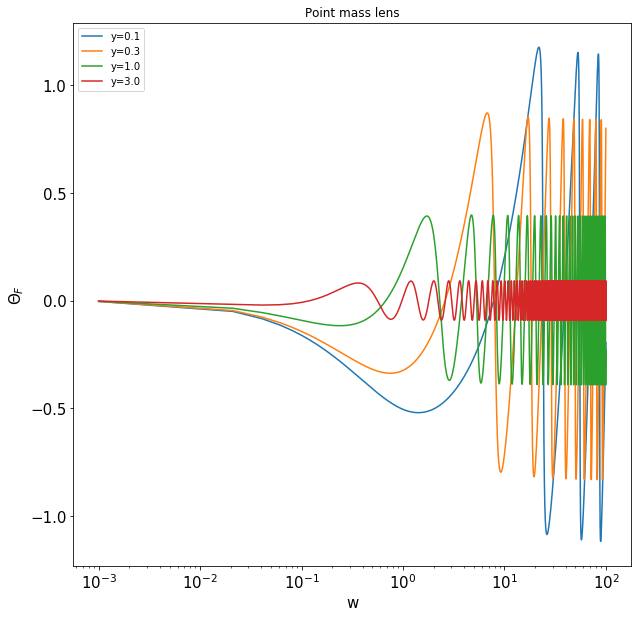

In [68]:
put_labels('w','$\Theta_F$','Point mass lens')
for fol,y in zip(folders_list_point, yLin):

    dfpoint=pd.read_csv(fol, sep="\t")
    #amp=dfpoint.Famp.values
    phase=dfpoint.Fphase.values

    plt.plot(w_range,phase,'-',label='y='+str(y))
    plt.xscale('log')
    plt.legend()
    plt.savefig('./Results/pointmass/phase_analytic_pointmass.png')
    #plt.show()

## Softened power law lens

In [107]:
folder_soft='./Results/softenedpowerlaw/Levin*'
folders_list_soft=sorted(glob.glob(folder_soft))
pLin=[1]
bLin=np.linspace(0,1,5)
w_range=np.linspace(0.001,100,1000)
folders_list_soft

['./Results/softenedpowerlaw/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.0_c_1_p_1.txt',
 './Results/softenedpowerlaw/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.25_c_1_p_1.txt',
 './Results/softenedpowerlaw/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.txt',
 './Results/softenedpowerlaw/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.75_c_1_p_1.txt',
 './Results/softenedpowerlaw/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0_c_1_p_1.txt',
 './Results/softenedpowerlaw/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_1.0_c_1_p_1.txt']

No handles with labels found to put in legend.


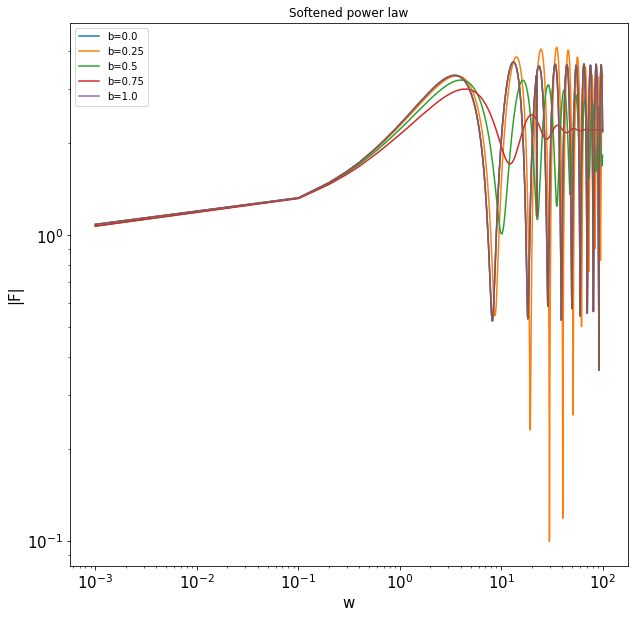

In [110]:
put_labels('w','|F|','Softened power law')
for fol,b in zip(folders_list_soft, bLin):

    dfSoft=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfSoft.res_adaptive.values]
    plt.plot(w_range,amp,'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.savefig('./Results/softenedpowerlaw/amp_analytic_softenedpowerlaw.png')
    #plt.show()
plt.plot(w_range,SISRefamp)

No handles with labels found to put in legend.


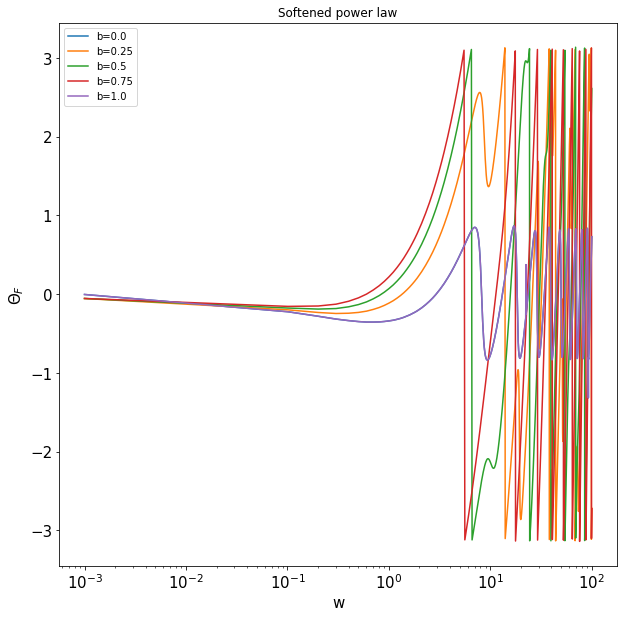

In [111]:
put_labels('w','$\Theta_F$','Softened power law')
for fol,b in zip(folders_list_soft, bLin):

    dfSoft=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfSoft.res_adaptive.values]    
    plt.plot(w_range,phase,'-',label='b='+str(b))
    plt.xscale('log')
    plt.legend()
    plt.savefig('./Results/softenedpowerlaw/phase_analytic_softenedpowerlaw.png')
    #plt.show()

No handles with labels found to put in legend.


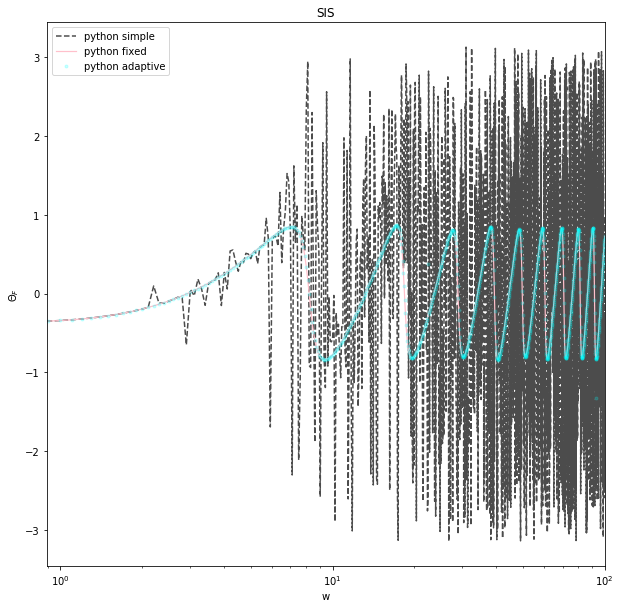

In [132]:
def create_plots (x_label, y_label, title):
    '''
    for idx, item in enumerate(label):
        subplot(x[idx],y[idx],label[idx])
    '''        
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.xscale('log')
    plt.legend(loc='lower right',prop={'size': 10})
    plt.yticks(size=10)
    plt.xticks(size=10)
    

    
plt.rcParams["figure.figsize"] = (10,10)
create_plots('w','$\Theta_F$','SIS')
plt.xlim(0, 100)
plt.plot(w,res_simple_phase,'--',label='python simple',color='k', alpha=0.7)
subplot(w,res_fixed_phase,label='python fixed',c='pink',style='-')
#plt.plot(w_math,abs_math, '-',label='mathematica result',color='pink',linewidth=1.2, alpha=0.8)
plt.plot(w,res_adaptive_phase,'.',label='python adaptive',color='cyan', alpha=0.2)
plt.legend()
plt.savefig('SIS_arg.png')


# w vs integration time in different ranges

No handles with labels found to put in legend.


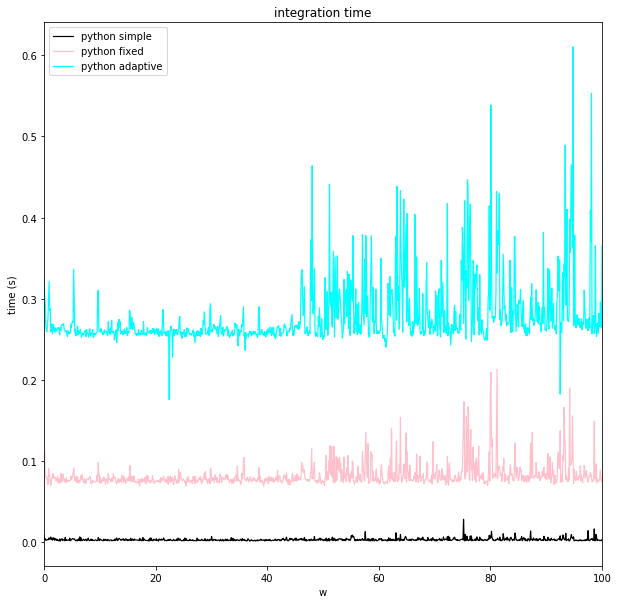

In [134]:
def create_plots (x_label, y_label, title):
    '''
    for idx, item in enumerate(label):
        subplot(x[idx],y[idx],label[idx])
    '''        
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    
    plt.legend(loc='lower right',prop={'size': 10})
    plt.yticks(size=10)
    plt.xticks(size=10)

create_plots('w','time (s)','integration time')
subplot(w,df.time_simple.values,label='python simple',c='k', style='-')
subplot(w,df.time_fixed.values,label='python fixed',c='pink',style='-')
subplot(w,df.time_adaptive.values,label='python adaptive',c='cyan',style='-')
#plt.plot(w,res_adaptive,'.',label='python fixed',color='cyan', alpha=0.2)
plt.savefig('SIS_time.png')

# range vs result time in different ranges

In [36]:
result_mathematica_01=[0.5 - 0.000208333j,0.499989 - 0.0020833j,0.498918 - 0.0207973j,0.401471 - 0.174582j,0.0220986 + 0.010906j]  
result_mathematica_04=[7.99997 + 0.0106666j,7.99691 + 0.106618j,7.69768 + 1.01875j,1.99384 - 0.934778j,0.154437 + 0.0608147j]
result_mathematica_06=[17.9996 + 0.0899984j,17.9563 + 0.898358j,14.1129 + 7.49035j,1.55844 - 0.713703j,0.141994 + 0.0735636j]
result_mathematica_08=[31.997 + 0.341313j,31.7059 + 3.39349j,11.6237 + 18.7993j,1.41083 - 0.562827j,0.142192 + 0.0684483j]


In [37]:
result_mathematica=result_mathematica_01+result_mathematica_04+result_mathematica_06+result_mathematica_08

In [54]:
res_real=[complex(df.result.values[j]).real for j in range(0,len(df.result.values))]
res_complex=[1j*complex(df.result.values[j]).imag for j in range(0,len(df.result.values))]
result_python=[res_real[j]+res_complex[j] for j in range(0,len(df.result.values))]

In [73]:
diff_percent_real=[abs(result_mathematica[j]-result_python[j])/((result_mathematica[j]+result_python[j])/2).real*100 for j in range(0,len(df.result.values))]

diff_percent_imag=[abs(result_mathematica[j]-result_python[j])/((result_mathematica[j]+result_python[j])/2).imag*100 for j in range(0,len(df.result.values))]



In [122]:
def create_plots (x_label, y_label, title):
    '''
    for idx, item in enumerate(label):
        subplot(x[idx],y[idx],label[idx])
    '''        
    #plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='lower right',prop={'size': 10})
    plt.yticks(size=10)
    plt.xticks(size=10)
    
    
def subplot(x,y,label,c,style='--'):
    plt.xlim(50, 100)
    plt.plot(x,y, style, label=label, color=c, alpha=1,linewidth=1.2)
    #plt.plot(x,y, style)

    plt.legend()
    

No handles with labels found to put in legend.


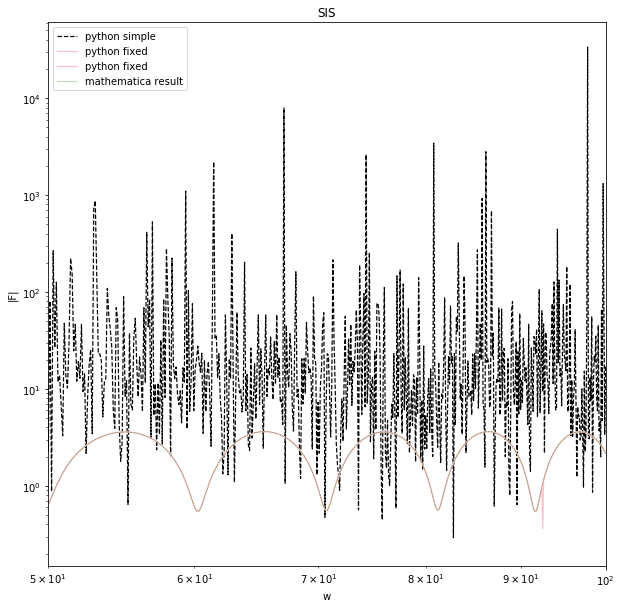

In [123]:
plt.rcParams["figure.figsize"] = (10,10)
create_plots('w','|F|','SIS')
subplot(w,res_simple,label='python simple',c='k')
subplot(w,res_fixed,label='python fixed',c='pink',style='-')
subplot(w,res_adaptive,label='python fixed',c='pink',style='-')
plt.plot(w_math,abs_math, '--',label='mathematica result',color='g',linewidth=0.5, alpha=0.8)
plt.legend()
plt.savefig('SIS_smaller_range.png')